<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Ana Esmeralda Rodríguez Rodríguez, Santiago Romero Riggen.

**Fecha:** 21 de junio del 2021.

**Expediente** : 709288, 715099.

**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: [Link con el enlace del repositorio del creador del proyecto](https://github.com/anarodriguezrod/Tarea5_ARodriguez_SRomero)

# Tarea 5: Clase 9

    
> Para las siguiente dos funciones, genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 1000 muestras generadas con el método de la transformada inversa y compárela con el función $f(x)$ **(recuerde que $f(x)$ es la distribución de probabilidad y $F(x)$ es la distribución de probabilidad acumulada)** [ver este enlace para más información](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_distribuci%C3%B3n). Este procedimiento se realiza con el fín de validar que el procedimiento y los resultados son correctos.
    
> 1. Generación variable aleatoria continua
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>

> 2. Generación variable aleatoria Discreta
> La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.
> Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como:
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

> **Nota:** Por notación recuerde que para el caso continuo $f(x)$ es la distribución de probabilidad (PDF), mientras $F(x)$ corresponde a la distribución de probabilidad acumulada (CDF). Para el caso discreto, $P(X=i)$ corresponde a su distribución de probabilidad (PMF) y $ F_{X}(x)=\operatorname {P} (X\leq x)=\sum _{x_{i}\leq x}\operatorname {P} (X=x_{i})=\sum _{x_{i}\leq x}p(x_{i})$, corresponde a su distribución de probabilidad acumulada (CDF).



In [4]:
#Librerias 

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy import optimize
import random
from scipy import optimize
import pandas as pd

#### Ejercicio 1: Ana Rodríguez

#### Obtener la función inversa 
> 1. Igualar $F(x)=U$
>$$\frac{2}{\pi}\sin^{-1}(\sqrt x) = U,\quad 0\leq x\leq 1$$ </font>

> 2. Despejar $x = F^{-1}(U)$
>$$x =sin^{2}{\frac{U\pi}{2}}$$ </font>

#### Para comparar
> 1. Deriva para obtener la función de distribución $f(x)=\frac{dF(x)}{dx}$
>$$\frac{d}{dx}=\frac{1}{\pi\sqrt{1-x}\sqrt{x}}$$ 

In [6]:
def Dist_1(N: 'Cantidad de datos que generar'):
    '''Generar variables aleatorias que distribuyen como f(x)'''
    U = np.random.rand(N)
    y = (np.sin((U*np.pi)/2))**2 #La función inversa que se obtuvo
    return y 

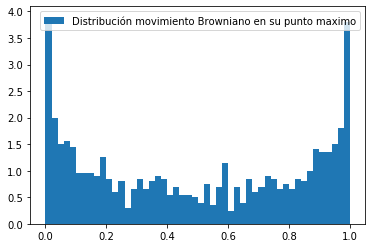

In [7]:
N = 1000
y = Dist_1(N) 

plt.hist(y, bins = 50, density = True, label = 'Distribución movimiento Browniano en su punto maximo')
plt.legend()
plt.show()

/Users/anarodriguez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


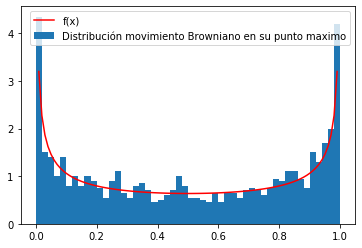

In [8]:
# Comparación
x = np.arange(0,1,0.01)
y2 = 1/(np.pi*np.sqrt(1-x)*np.sqrt(x))
plt.plot(x,y2,'r', label = 'f(x)')

N = 1000
y = Dist_1(N) 
plt.hist(y, bins = 50, density = True, label = 'Distribución movimiento Browniano en su punto maximo')
plt.legend()
plt.show() 

#### Ejercicio 1: Santiago Romero

In [1]:
# Derivada de F(x)
f = lambda x: 1 / (((1-x)**.5)*(((x)**.5)*(np.pi)))
# Inversa de F(x) igualando a U
inversa = lambda u: np.sin((np.pi * u) / 2)**2

In [6]:
def aleatorios(f, inversa, n):
    u = np.random.uniform(0, 1, n)
    f_aleat = inversa(u)
    x = np.arange(.05, .95, .01)
    f_dens = f(x)
    plt.hist(f_aleat, bins=40, density = True)
    plt.plot(x, f_dens)
    plt.show()
n = 10000

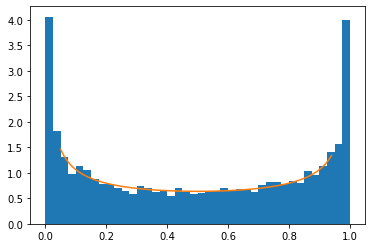

In [7]:
aleatorios(f, inversa, n)

#### Ejercicio 2: Ana Rodríguez

In [13]:
# Función que calcula la probabilidad acumulada 
def Dist_Binomial_acum(n:'Parámetro n',
                  p: 'Parámetro p'):
    ''' Esta función calcula la probabilidad acumulada'''
    vec_prob = np.zeros(n) # vector de ceros
    vec_prob[0] = (1-p)**n #valor inicial del vector
    def llenar_vec_prob(i):
        nonlocal vec_prob #se encarga de llenar el vector
        c  = p/(1-p)
        vec_prob[i+1]=(c*(n-i)/(i+1))*vec_prob[i]
        
    # Lleno el vector Pr usando compresión de listas
    [llenar_vec_prob(i) for i in range(n-1)] #la llamo iterativamente
    return np.cumsum(vec_prob) #retorno la probabilidad acumulada

In [14]:
def Gen_distr_discreta(p_acum: 'P.Acumulada de la distribución a generar',
                       indices: 'valores reales a generar aleatoriamente',
                       N: 'cantidad de números aleatorios a generar'):
    
    U = np.random.rand(N)
    # Diccionario de valores aleatorios
    rand2reales = {i: idx for i, idx in enumerate(indices)}

    # Series de los valores aletorios
    y = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in U]).map(rand2reales)

    return y

def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[10,4])
    y, x = np.histogram(distribucion, bins=len(set(distribucion)), density=densidad) #len(set(distribucion)) me dice cuantos valores diferentes hay en distribución ( con lo que hare el numero de barritas)
    plt.bar(x[1:], y, label=label)
    plt.legend()
    plt.show()

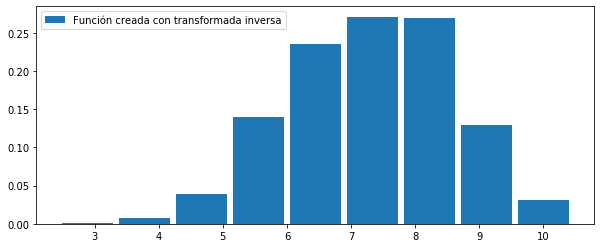

In [15]:
# def D_binomial_intermedia(n,p,N):
n = 10; p = 0.7; N = 1000

p_acum = Dist_Binomial_acum(n,p)

# Usando el método de la transformada inversa
d_binomial = Gen_distr_discreta(p_acum, np.arange(0, n+1), N) #np.arange(entre 0 y n+1)
plot_histogram_discrete(d_binomial, 'Función creada con transformada inversa')

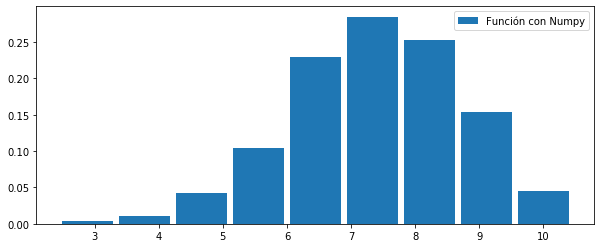

In [16]:
# Comparar Usando numpy
d_bino_numpy = np.random.binomial(n,p,N)
plot_histogram_discrete(d_bino_numpy, 'Función con Numpy')

#### Ejercicio 2: Santiago Romero

In [8]:
# Solución SRR
def distribucion(u: 'vector # aleatorios',
                 p_acum: 'P acumulada de la dist'):
    v = np.array(list(map(lambda x: sum(1 for i in p_acum if i < u[x]), range(10000))))
    return v

def histograma(distribucion: 'VA de una distr dada',
              densidad:'regresa densidad' = True):
    plt.figure()
    y, x = np.histogram(distribucion,
                        bins=30,
                        density=densidad)
    plt.bar(x[1:], y)
    plt.show()

In [9]:
# Se define la función
def P_Binom(n, p):
    P = np.zeros(n)
    P[0] = (1-p)**n
    def q(i):
        nonlocal P
        c = p / (1-p)
        P[i+1] = (c*(n-1) / (i+1)) * P[i]
    [q(i) for i in range(n-1)]
    return np.cumsum(P)

In [10]:
p_acu = P_Binom(10, 0.7)
u= np.random.rand(10000)
#trans inversa
d_binom = distribucion(u, p_acu)
# numpy
np_binomial = np.random.binomial(10, .7, 10000)

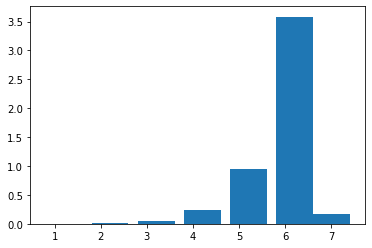

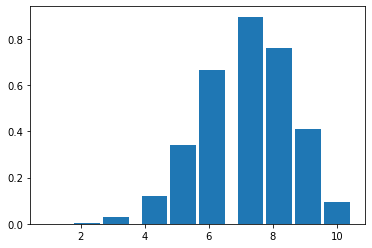

In [12]:
#ploteamos los dos histogramas
histograma(d_binom)
histograma(np_binomial)